In [2]:
import numpy as np
import requests
import pandas as pd
import json

import matplotlib
import matplotlib.pyplot as plt
import scipy

import random
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [63]:
print(f"numpy=={np.__version__}")
print(f"pandas=={pd.__version__}")
print(f"matplotlib=={matplotlib.__version__}")
print(f"scipy=={scipy.__version__}")

numpy==2.4.0
pandas==2.3.3
matplotlib==3.10.8
scipy==1.16.3


In [3]:
df_artists = pd.read_csv("Data/top_artist_lastfm.csv")
df_tracks = pd.read_csv("Data/top_tracks_lastfm.csv")

¿Existe correlación significativa entre reproducciones y oyentes en la tabla de Artistas?

In [7]:
# Agregar por artista
artist_agg = (
    df_tracks.groupby("artist", as_index=False)
      .agg(
          total_playcount=("playcount", "sum"),
          total_listeners=("listeners", "sum"),
          tracks=("name", "count")))

In [8]:
# Normalizar columnas
df_tracks.columns = df_tracks.columns.str.strip().str.lower()

In [9]:
df_tracks

,name,duration,playcount,listeners,artist
0,HELICOPTER,160,1171096,301206,A$AP Rocky
1,End of Beginning,159,30276407,1851849,Djo
2,Order of Protection,171,597494,260783,A$AP Rocky
3,Stateside + Zara Larsson,176,5298821,485962,PinkPantheress
4,STOLE YA FLOW,199,762263,247930,A$AP Rocky
5,Playa,227,552375,219931,A$AP Rocky
6,STAY HERE 4 LIFE,346,599725,218279,A$AP Rocky
7,Interrogation (Skit),49,432962,208833,A$AP Rocky
8,Fame Is a Gun,181,14614979,826808,Addison Rae
9,Punk Rocky,234,1405045,291406,A$AP Rocky


In [10]:
artist_df = df_tracks.groupby("artist", as_index=False).agg(
    playcount=("playcount", "sum"),
    listeners=("listeners", "sum"),
    n_tracks=("name", "count")
)

In [11]:
print("Nº artistas:", artist_df.shape[0])
print(artist_df.head())

Nº artistas: 28
           artist  playcount  listeners  n_tracks
0      A$AP Rocky    9351500    3322199        17
1     Addison Rae   14614979     826808         1
2  Arctic Monkeys   54802235    2900397         1
3      Bruno Mars   25027477    2639589         2
4   Chappell Roan   56505217    1991997         1


In [12]:
pearson_corr = artist_agg["total_playcount"].corr(
    artist_agg["total_listeners"],
    method="pearson"
)

spearman_corr = artist_agg["total_playcount"].corr(
    artist_agg["total_listeners"],
    method="spearman"
)

# Resultados
print("Correlación Pearson:", pearson_corr)
print("Correlación Spearman:", spearman_corr)

Correlación Pearson: 0.817800171760373
Correlación Spearman: 0.7443897099069513


Esto nos indica que, en general:
Cuantos más oyentes tiene un artista, mayor es su número total de reproducciones.

In [13]:
print(df_tracks.columns)

Index(['name', 'duration', 'playcount', 'listeners', 'artist'], dtype='object')


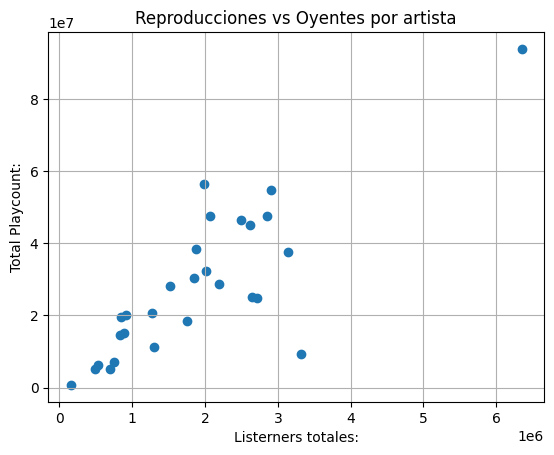

In [14]:
# Scatter plot para hacerlo visual
plt.figure()
plt.scatter(
    artist_agg["total_listeners"],
    artist_agg["total_playcount"]
)
plt.xlabel("Listerners totales:")
plt.ylabel("Total Playcount:")
plt.title("Reproducciones vs Oyentes por artista")
plt.grid()
plt.show()

¿Existe una correlación significativa entre reproducciones y oyentes en la tabla de Canciones?

In [15]:
print(df_tracks.columns)

Index(['name', 'duration', 'playcount', 'listeners', 'artist'], dtype='object')


In [16]:
# Añandimos columna Ratio = playcount / listeners
artist_agg["ratio"] = (
    artist_agg["total_playcount"] / artist_agg["total_listeners"])

In [17]:
print(df_tracks.columns)

Index(['name', 'duration', 'playcount', 'listeners', 'artist'], dtype='object')


In [18]:
# Correlación Pearson (por canción)
pearson_corr_tracks = df_tracks["playcount"].corr(df_tracks["listeners"])

print("Correlación Pearson (playcount vs listeners, tracks):", pearson_corr_tracks)

Correlación Pearson (playcount vs listeners, tracks): 0.926302059344519


In [19]:
# Normalizar columnas
df_tracks.columns = df_tracks.columns.str.strip().str.lower()

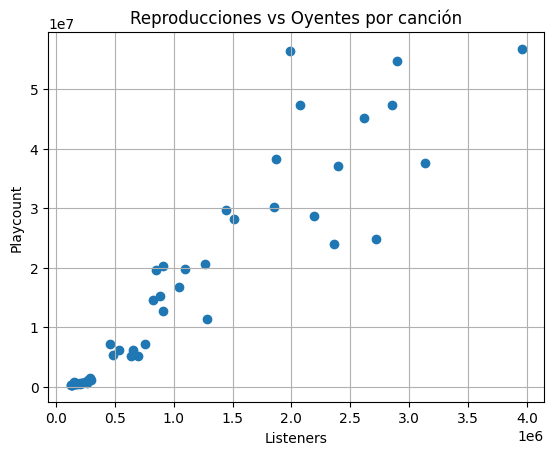

In [20]:
plt.figure()
plt.scatter(df_tracks["listeners"], df_tracks["playcount"])
plt.xlabel("Listeners")
plt.ylabel("Playcount")
plt.title("Reproducciones vs Oyentes por canción")

plt.grid()
plt.show()

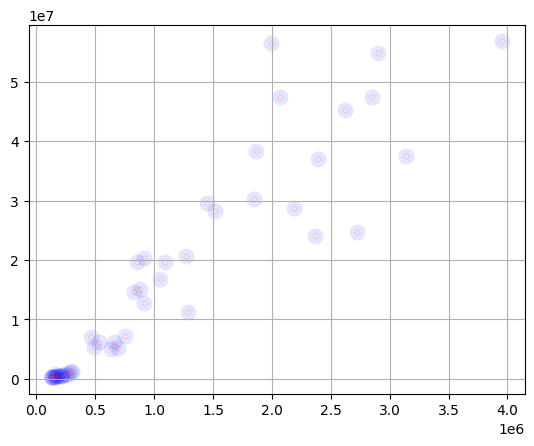

In [21]:
plt.scatter(df_tracks["listeners"],
            df_tracks["playcount"],
            alpha = 0.1,
            color = "red",
            marker = "o",
            edgecolors = "blue",
            s = 20,
            linewidths = 7)

plt.grid()
plt.show()

Cada punto es un artista. Se observa una tendencia creciente clara → correlación positiva.

________________________________________________________________________________________________________

¿Cuál es el ratio de reproducciones por oyente en la tabla de Artistas?

In [22]:
## Agregar por artista
artist_agg = (
    df_tracks.groupby("artist", as_index=False)
      .agg(
          total_playcount=("playcount", "sum"),
          total_listeners=("listeners", "sum")))

In [23]:
# Calcular ratio playcount / listeners
artist_agg["playcount_listener_ratio"] = (
    artist_agg["total_playcount"] / artist_agg["total_listeners"])

In [24]:
# resultados
print(artist_agg.sort_values("playcount_listener_ratio", ascending=False))

               artist  total_playcount  total_listeners  \
4       Chappell Roan         56505217          1991997   
19         Tate McRae         19635927           851604   
17            TV Girl         47426792          2069835   
20       Taylor Swift         20255261           911695   
26                bôa         38317157          1869474   
2      Arctic Monkeys         54802235          2900397   
8        Jeff Buckley         28220437          1516741   
22         The Marías         46376542          2498918   
1         Addison Rae         14614979           826808   
18        Tame Impala         45162037          2619579   
9             KATSEYE         15204378           883588   
23  The Neighbourhood         47424073          2851088   
5                 Djo         30276407          1851849   
27              sombr         20644179          1268386   
15  Sabrina Carpenter         32443684          2007692   
14          Radiohead         93828331          6348911 

In [25]:
# Ordenar por ratio
artist_agg_sorted = artist_agg.sort_values(
    "playcount_listener_ratio",
    ascending=False)

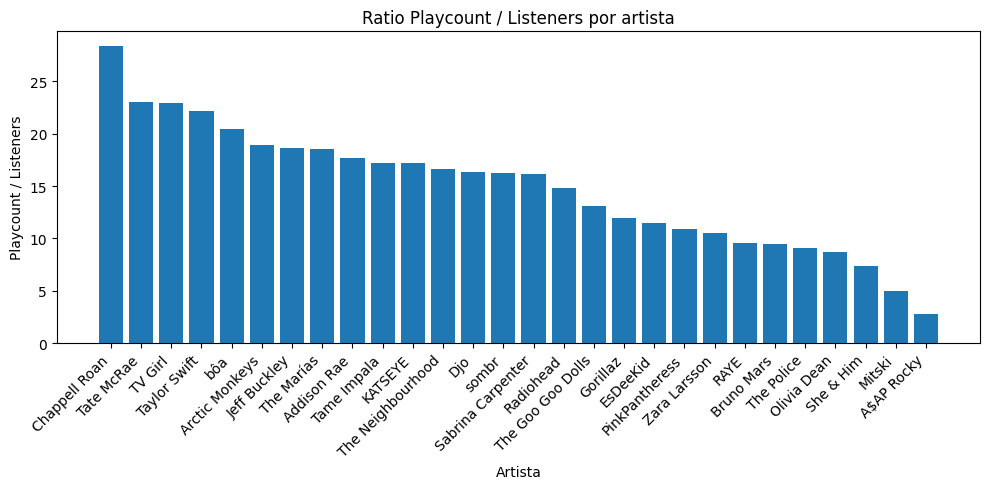

In [26]:
# Gráfico de barras
plt.figure(figsize=(10, 5))
plt.bar(
    artist_agg_sorted["artist"],
    artist_agg_sorted["playcount_listener_ratio"]
)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Artista")
plt.ylabel("Playcount / Listeners")
plt.title("Ratio Playcount / Listeners por artista")
plt.tight_layout()
plt.show()

El ratio de reproducciones por oyentes en la tabla de Artistas suele es generalmente altoen artistas como Chappell Roan con más canciones por oyentes únicos pero más baja en artistas como Prince que tienen menos canciones en el Top pero más reproducidas. 

_______________________________________________________________________________________________________________________________________________

Cuales son los Artistas con un ratio Reproducciones por Oyente más alto?

In [27]:
# Ratio playcount / listeners
artist_agg["ratio"] = (
    artist_agg["total_playcount"] / artist_agg["total_listeners"]
)

In [28]:
df_tracks["ratio"] = df_tracks["playcount"] / df_tracks["listeners"]

In [29]:
df_sorted = df_tracks.sort_values("ratio", ascending=False)

In [30]:
df_sorted

,name,duration,playcount,listeners,artist,ratio
29,"Good Luck, Babe!",218,56505217,1991997,Chappell Roan,28.366116
48,Sports car,165,19635927,851604,Tate McRae,23.057580
41,Lovers Rock,213,47426792,2069835,TV Girl,22.913320
12,The Fate of Ophelia,226,20255261,911695,Taylor Swift,22.217146
38,Duvet,203,38317157,1869474,bôa,20.496224
28,No One Noticed,236,29641166,1448978,The Marías,20.456602
31,505,305,54802235,2900397,Arctic Monkeys,18.894736
27,"Lover, You Should've Come Over",403,28220437,1516741,Jeff Buckley,18.605970
36,Manchild,213,19701278,1094395,Sabrina Carpenter,18.001981
8,Fame Is a Gun,181,14614979,826808,Addison Rae,17.676388


In [31]:
# Top 5 - Top 10
top5 = artist_agg.sort_values("ratio", ascending=False).head(5)
top10 = artist_agg.sort_values("ratio", ascending=False).head(10)

In [32]:
top5

,artist,total_playcount,total_listeners,playcount_listener_ratio,ratio
4,Chappell Roan,56505217,1991997,28.366116,28.366116
19,Tate McRae,19635927,851604,23.057580,23.057580
17,TV Girl,47426792,2069835,22.913320,22.913320
20,Taylor Swift,20255261,911695,22.217146,22.217146
26,bôa,38317157,1869474,20.496224,20.496224


In [33]:
top10

,artist,total_playcount,total_listeners,playcount_listener_ratio,ratio
4,Chappell Roan,56505217,1991997,28.366116,28.366116
19,Tate McRae,19635927,851604,23.057580,23.057580
17,TV Girl,47426792,2069835,22.913320,22.913320
20,Taylor Swift,20255261,911695,22.217146,22.217146
26,bôa,38317157,1869474,20.496224,20.496224
2,Arctic Monkeys,54802235,2900397,18.894736,18.894736
8,Jeff Buckley,28220437,1516741,18.605970,18.605970
22,The Marías,46376542,2498918,18.558649,18.558649
1,Addison Rae,14614979,826808,17.676388,17.676388
18,Tame Impala,45162037,2619579,17.240189,17.240189


In [34]:
top10_tracks = (df_tracks.sort_values("playcount", ascending=False).head(10))
top10_tracks

,name,duration,playcount,listeners,artist,ratio
22,Creep,235,56779491,3954530,Radiohead,14.358088
29,"Good Luck, Babe!",218,56505217,1991997,Chappell Roan,28.366116
31,505,305,54802235,2900397,Arctic Monkeys,18.894736
41,Lovers Rock,213,47426792,2069835,TV Girl,22.913320
40,Sweater Weather,240,47424073,2851088,The Neighbourhood,16.633676
24,The Less I Know the Better,217,45162037,2619579,Tame Impala,17.240189
38,Duvet,203,38317157,1869474,bôa,20.496224
45,Feel Good Inc.,236,37520168,3135724,Gorillaz,11.965392
32,Let Down,337,37048840,2394381,Radiohead,15.473243
1,End of Beginning,159,30276407,1851849,Djo,16.349285


In [35]:
# artistas con ratio alto
high_ratio_artists = artist_agg[artist_agg["ratio"] > artist_agg["ratio"].mean()].sort_values("ratio", ascending=False)

In [36]:
high_ratio_artists

,artist,total_playcount,total_listeners,playcount_listener_ratio,ratio
4,Chappell Roan,56505217,1991997,28.366116,28.366116
19,Tate McRae,19635927,851604,23.057580,23.057580
17,TV Girl,47426792,2069835,22.913320,22.913320
20,Taylor Swift,20255261,911695,22.217146,22.217146
26,bôa,38317157,1869474,20.496224,20.496224
2,Arctic Monkeys,54802235,2900397,18.894736,18.894736
8,Jeff Buckley,28220437,1516741,18.605970,18.605970
22,The Marías,46376542,2498918,18.558649,18.558649
1,Addison Rae,14614979,826808,17.676388,17.676388
18,Tame Impala,45162037,2619579,17.240189,17.240189


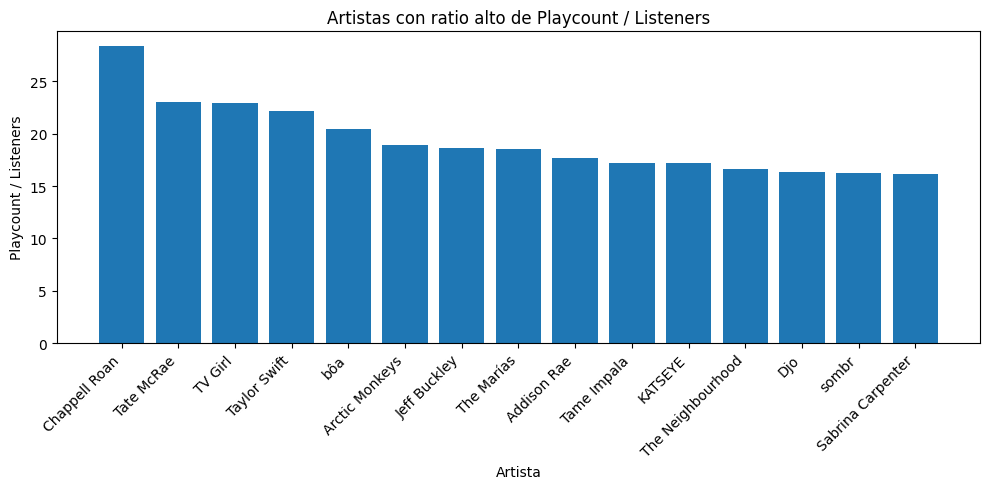

In [37]:
plt.figure(figsize=(10, 5))
plt.bar(
    high_ratio_artists["artist"],
    high_ratio_artists["ratio"]
)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Artista")
plt.ylabel("Playcount / Listeners")
plt.title("Artistas con ratio alto de Playcount / Listeners")
plt.tight_layout()
plt.show()

Los artistas representados muestran un ratio superior a la media, lo que indica:

Mayor frecuencia de escucha por oyente

Audiencias más fieles

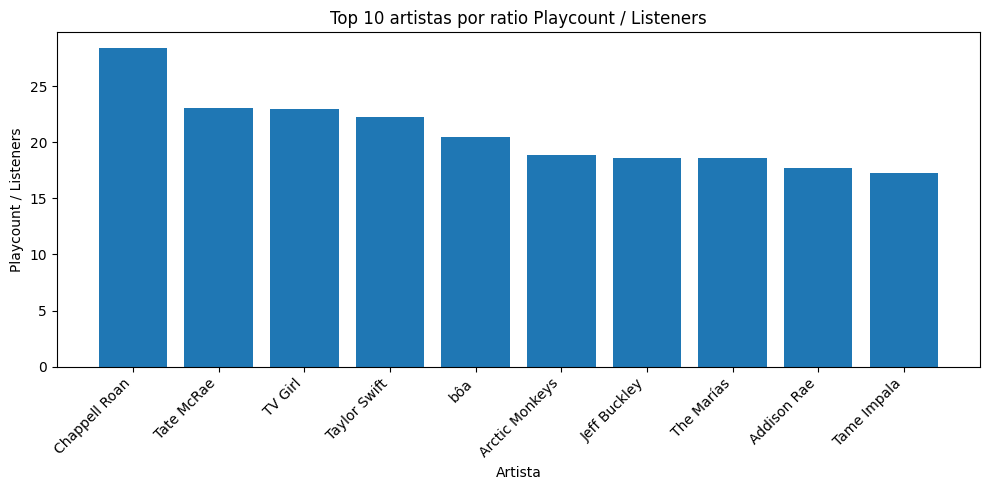

In [38]:
plt.figure(figsize=(10, 5))
plt.bar(top10["artist"], top10["ratio"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Artista")
plt.ylabel("Playcount / Listeners")
plt.title("Top 10 artistas por ratio Playcount / Listeners")
plt.tight_layout()
plt.show()

In [39]:
# Media del ratio
global_mean = artist_agg["ratio"].mean()

In [40]:
global_mean

np.float64(14.835759998671064)

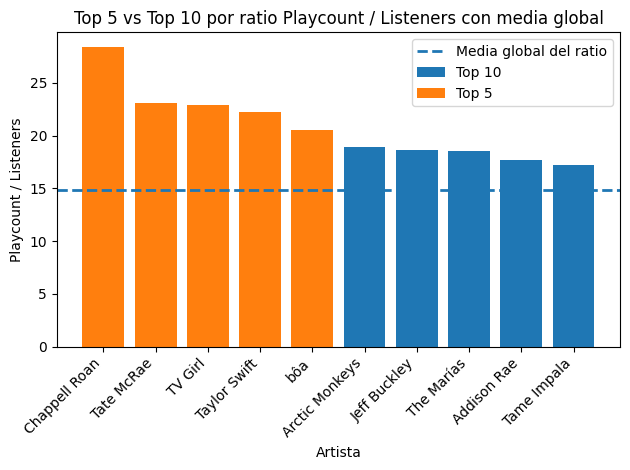

In [41]:
# Barras Top 10
plt.bar(top10["artist"], top10["ratio"], label="Top 10")
# Barras Top 5 
top5 = artist_agg.sort_values("ratio", ascending=False).head(5)
plt.bar(top5["artist"], top5["ratio"], label="Top 5")
# Línea de media global
plt.axhline(
    y=global_mean,
    linestyle="--",
    linewidth=2,
    label="Media global del ratio"
)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Artista")
plt.ylabel("Playcount / Listeners")
plt.title("Top 5 vs Top 10 por ratio Playcount / Listeners con media global")
plt.legend()
plt.tight_layout()
plt.show()

Aquí sacamos el top 5 y top 10 de artistas que destacan en su ratio de Reproducciones por Oyente

______________________________________________________________________________________________________________________________________________________________

¿Cuál es el ratio de Reproducciones por Oyente en la tabla de Tracks?

In [42]:
# ratio por track
df_tracks["ratio"] = df_tracks["playcount"] / df_tracks["listeners"]

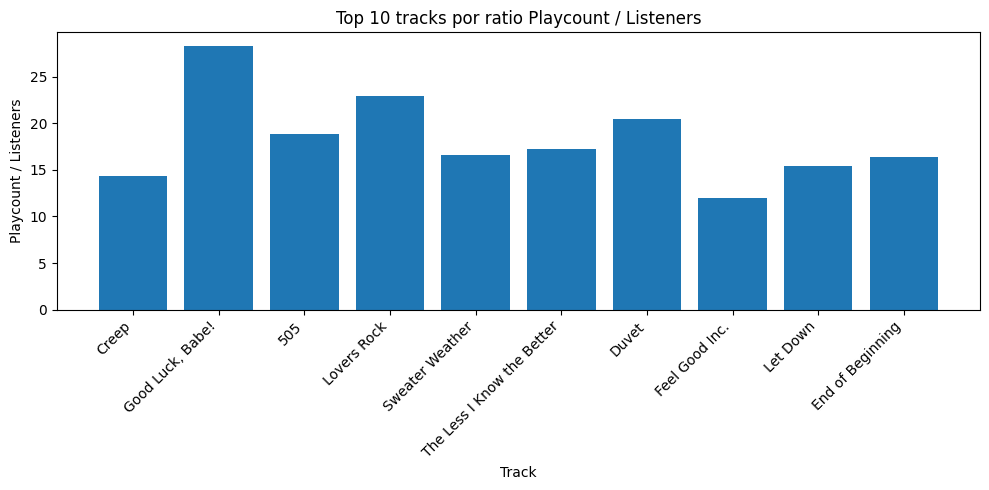

In [43]:
plt.figure(figsize=(10, 5))
plt.bar(top10_tracks["name"], top10_tracks["ratio"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Track")
plt.ylabel("Playcount / Listeners")
plt.title("Top 10 tracks por ratio Playcount / Listeners")
plt.tight_layout()
plt.show()

Un ratio alto por track indica:

Canciones muy reescuchadas

Posible efecto de repetición o “tema favorito”

A diferencia del análisis por artista:

Aquí se identifican canciones concretas, no audiencias fieles globales.

____________________________________________________________________________________________________________________

¿Cuáles son las canciones más repetidas?

In [67]:
# Media global del ratio
mean_ratio = df_tracks["ratio"].mean()

In [68]:
repetitive_tracks = (
    df_tracks[df_tracks["ratio"] > mean_ratio]
    .sort_values("ratio", ascending=False)
)

In [69]:
print(repetitive_tracks[["name", "artist", "ratio"]])

                              name             artist      ratio
29                Good Luck, Babe!      Chappell Roan  28.366116
48                      Sports car         Tate McRae  23.057580
41                     Lovers Rock            TV Girl  22.913320
12             The Fate of Ophelia       Taylor Swift  22.217146
38                           Duvet                bôa  20.496224
28                  No One Noticed         The Marías  20.456602
31                             505     Arctic Monkeys  18.894736
27  Lover, You Should've Come Over       Jeff Buckley  18.605970
36                        Manchild  Sabrina Carpenter  18.001981
8                    Fame Is a Gun        Addison Rae  17.676388
24      The Less I Know the Better        Tame Impala  17.240189
43                        Gabriela            KATSEYE  17.207542
40                 Sweater Weather  The Neighbourhood  16.633676
1                 End of Beginning                Djo  16.349285
21                 back t

In [70]:
top20_repetitive = repetitive_tracks.head(20)

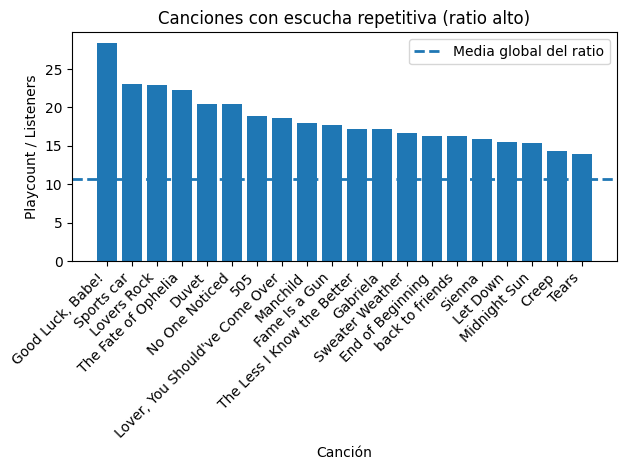

In [71]:
plt.bar(top20_repetitive["name"], top20_repetitive["ratio"])
# Línea de media global
plt.axhline(
    y=mean_ratio,
    linestyle="--",
    linewidth=2,
    label="Media global del ratio"
)

plt.xticks(rotation=45, ha="right")
plt.xlabel("Canción")
plt.ylabel("Playcount / Listeners")
plt.title("Canciones con escucha repetitiva (ratio alto)")
plt.legend()
plt.tight_layout()
plt.show()

Las canciones representadas presentan un ratio playcount/listeners superior a la media, lo que indica:

Alta frecuencia de repetición

Mayor capacidad de retención por oyente

Estas canciones suelen corresponder a:

Temas “favoritos”

Canciones cortas o muy memorables

Reproducciones repetidas en corto periodo de tiempo

__________________________________________________________________________________________________________

¿Cuál es la diferencia de repetición entre las tablas Artistas y Tracks?

In [72]:
#  Ratio por track
df_tracks["ratio"] = df_tracks["playcount"] / df_tracks["listeners"]

In [73]:
track_mean_ratio = df_tracks["ratio"].mean()

In [74]:
artist_agg = (
    df_tracks.groupby("artist")
      .agg(
          tracks=("name", "count"),
          playcount=("playcount", "sum"),
          listeners=("listeners", "sum")
      )
)
artist_agg["ratio_total"] = artist_agg["playcount"] / artist_agg["listeners"]

In [75]:
artist_agg["ratio_mean_track"] = df_tracks.groupby("artist")["ratio"].mean()

In [76]:
# Promedios artista
artist_mean_total = artist_agg["ratio_total"].mean()
artist_mean_trackmean = artist_agg["ratio_mean_track"].mean()

In [77]:
summary = pd.DataFrame({
    "Nivel": ["Tracks", "Artistas"],
    "Ratio medio (media simple)": [track_mean_ratio, artist_mean_trackmean],
    "Ratio medio (ratio total)": [np.nan, artist_mean_total]
})

print("\n=== Comparación ratio medio artistas vs tracks ===")
print(summary.round(3))


=== Comparación ratio medio artistas vs tracks ===
      Nivel  Ratio medio (media simple)  Ratio medio (ratio total)
0    Tracks                      10.671                        NaN
1  Artistas                      14.783                     14.836


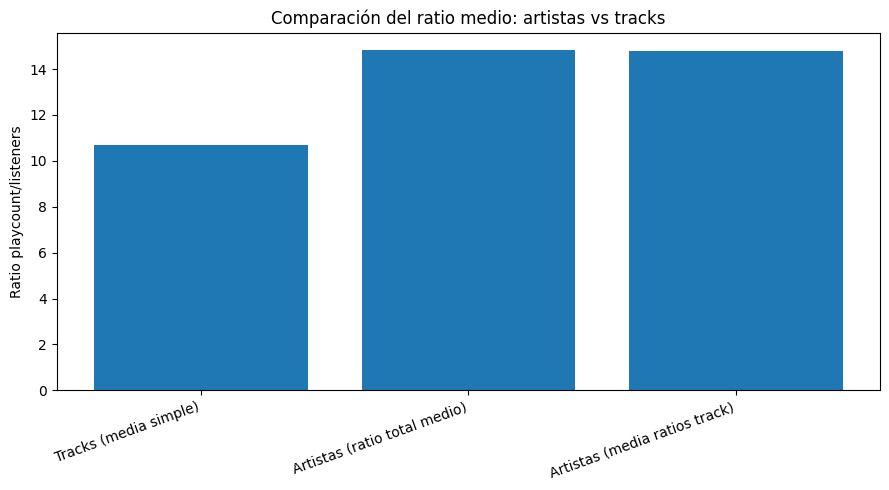

In [78]:
labels = [
    "Tracks (media simple)",
    "Artistas (ratio total medio)",
    "Artistas (media ratios track)"
]
values = [track_mean_ratio, artist_mean_total, artist_mean_trackmean]

plt.figure(figsize=(9, 5))
plt.bar(labels, values)
plt.ylabel("Ratio playcount/listeners")
plt.title("Comparación del ratio medio: artistas vs tracks")
plt.xticks(rotation=20, ha="right")
plt.tight_layout()
plt.show()

Los usuarios no escuchan tracks aislados únicamente, sino que tienden a:
-epetir artistas
-escuchar varias canciones del mismo artista
-mostrar fidelización 

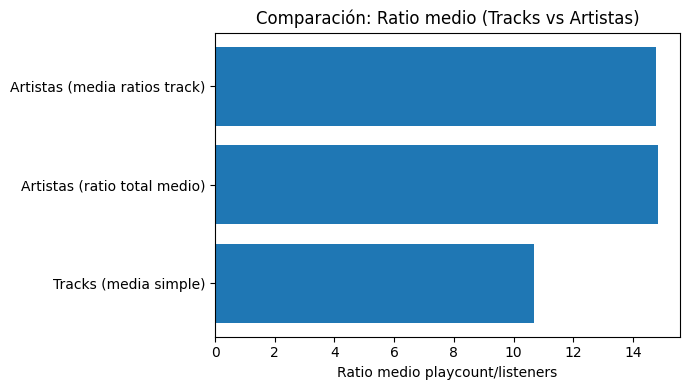

In [79]:
plt.figure(figsize=(7, 4))
plt.barh(labels, values)
plt.xlabel("Ratio medio playcount/listeners")
plt.title("Comparación: Ratio medio (Tracks vs Artistas)")
plt.tight_layout()
plt.show()


Este grafico identifica que el consumo se vuelve más repetitivo cuando analizamos el artista completo en lugar de canciones sueltas.


________________________________________________________________________________________________________________________________________

¿Hay alguna forma de visualizar la fidelización y los oyentes casuales en un grafico?

In [80]:
df_tracks = df_tracks.dropna(subset=["playcount", "listeners", "artist", "name"])
df_tracks = df_tracks[df_tracks["listeners"] > 0].copy()

In [81]:
df_tracks["ratio"] = df_tracks["playcount"] / df_tracks["listeners"]

In [82]:
low_thr = df_tracks["ratio"].quantile(0.05)
high_thr = df_tracks["ratio"].quantile(0.95)

In [83]:
df_tracks["is_outlier"] = (df_tracks["ratio"] <= low_thr) | (df_tracks["ratio"] >= high_thr)

In [84]:
print(f"Umbral inferior (5%): {low_thr:.3f}")
print(f"Umbral superior (95%): {high_thr:.3f}")
print("Nº outliers:", df_tracks["is_outlier"].sum())

Umbral inferior (5%): 2.163
Umbral superior (95%): 22.600
Nº outliers: 6


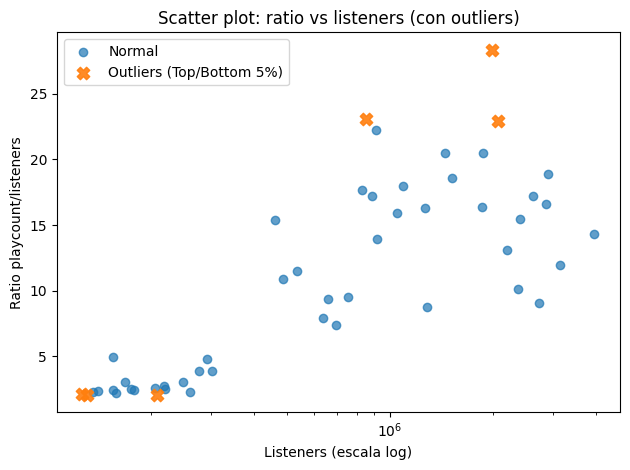

In [86]:
plt.scatter(
    df_tracks.loc[~df_tracks["is_outlier"], "listeners"],
    df_tracks.loc[~df_tracks["is_outlier"], "ratio"],
    alpha=0.7,
    label="Normal"
)

# outliers
plt.scatter(
    df_tracks.loc[df_tracks["is_outlier"], "listeners"],
    df_tracks.loc[df_tracks["is_outlier"], "ratio"],
    alpha=0.9,
    marker="X",
    s=80,
    label="Outliers (Top/Bottom 5%)")

plt.xscale("log")  
plt.xlabel("Listeners (escala log)")
plt.ylabel("Ratio playcount/listeners")
plt.title("Scatter plot: ratio vs listeners (con outliers)")
plt.legend()
plt.tight_layout()
plt.show()

Este grafico con Oultliers, grafica en la parte superior aparecen tracks con alta fidelización (mucha repetición por usuario), mientras que en la parte inferior se observan tracks de consumo ocasional o superficial.

____________________________________________________________________________________________________________________________

¿Cuáles son los patrones de consumo?

In [87]:
df_tracks = df_tracks.dropna(subset=["playcount", "listeners", "artist", "name"])
df_tracks = df_tracks[df_tracks["listeners"] > 0].copy()

In [88]:
df_tracks["ratio"] = df_tracks["playcount"] / df_tracks["listeners"]

In [89]:
df_tracks["log_listeners"] = np.log10(df_tracks["listeners"])
df_tracks["log_playcount"] = np.log10(df_tracks["playcount"])

In [90]:
features = df_tracks[["log_listeners", "log_playcount", "ratio"]].copy()

In [91]:
scaler = StandardScaler()
X = scaler.fit_transform(features)

In [92]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df_tracks["cluster"] = kmeans.fit_predict(X)

In [93]:
cluster_summary = df_tracks.groupby("cluster").agg(
    n_tracks=("name", "count"),
    mean_listeners=("listeners", "mean"),
    mean_playcount=("playcount", "mean"),
    mean_ratio=("ratio", "mean"),
    median_ratio=("ratio", "median"),
).round(2)

print("\n=== Resumen de patrones (clusters) ===")
print(cluster_summary)


=== Resumen de patrones (clusters) ===
         n_tracks  mean_listeners  mean_playcount  mean_ratio  median_ratio
cluster                                                                    
0              10      2697961.00     38645613.80       14.33         14.92
1              19       197596.05       589096.11        2.86          2.49
2              12      1315286.75     27241845.58       20.10         19.53
3               9       713871.00      7345059.89       10.53          9.54


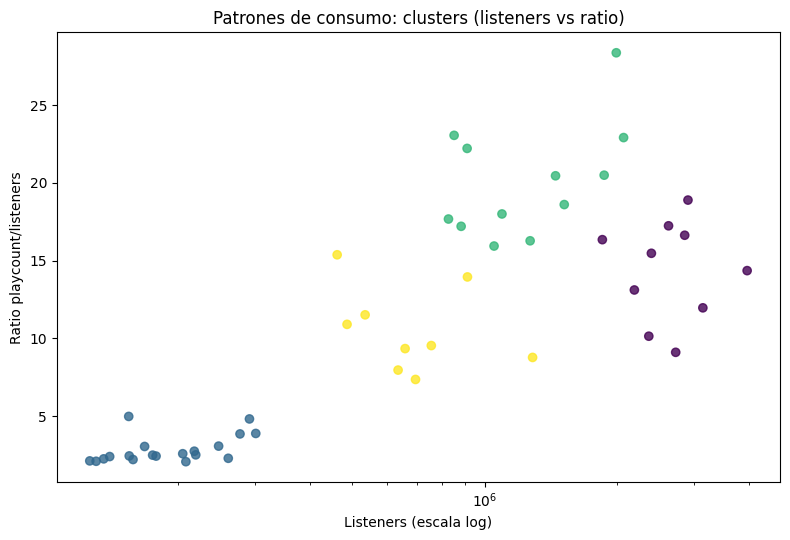

In [94]:
plt.figure(figsize=(8, 5.5))
plt.scatter(df_tracks["listeners"], df_tracks["ratio"], c=df_tracks["cluster"], alpha=0.8)

plt.xscale("log")
plt.xlabel("Listeners (escala log)")
plt.ylabel("Ratio playcount/listeners")
plt.title("Patrones de consumo: clusters (listeners vs ratio)")
plt.tight_layout()
plt.show()


Cluster 0: alto listeners + ratio medio → hits estables

Cluster 1: alto listeners + ratio bajo → viral/casual

Cluster 2: listeners bajos + ratio alto → nicho repetitivo

Cluster 3: listeners bajos + ratio bajo → nicho ocasional

Es decir: el mercado no se explica solo por popularidad, sino por la combinación de alcance y fidelización.

In [ ]:
__________________________________________________________________________________________________________________________

Ejercicio Especial, haciendo un resumen de todos los ejercicios anteriores y poniendo en practica "Dashboard de análisis: consumo musical (tracks vs artistas)"

In [96]:
artist_agg = df_tracks.groupby("artist").agg(
    n_tracks=("name", "count"),
    total_playcount=("playcount", "sum"),
    total_listeners=("listeners", "sum"),
)
artist_agg["ratio_total"] = artist_agg["total_playcount"] / artist_agg["total_listeners"]
artist_agg["ratio_mean_track"] = df_tracks.groupby("artist")["ratio"].mean()

In [97]:
track_mean_ratio = df_tracks["ratio"].mean()
artist_mean_total = artist_agg["ratio_total"].mean()
artist_mean_trackmean = artist_agg["ratio_mean_track"].mean()

In [98]:
low_thr = df_tracks["ratio"].quantile(0.05)
high_thr = df_tracks["ratio"].quantile(0.95)
df_tracks["is_outlier"] = (df_tracks["ratio"] <= low_thr) | (df_tracks["ratio"] >= high_thr)

In [99]:
df_tracks["log_listeners"] = np.log10(df_tracks["listeners"])
df_tracks["log_playcount"] = np.log10(df_tracks["playcount"])
features = df_tracks[["log_listeners", "log_playcount", "ratio"]].copy()

In [100]:
X = StandardScaler().fit_transform(features)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df_tracks["cluster"] = kmeans.fit_predict(X)

In [101]:
artist_stats = artist_agg.reset_index().copy()


In [102]:
artist_stats.columns

Index(['artist', 'n_tracks', 'total_playcount', 'total_listeners',
       'ratio_total', 'ratio_mean_track'],
      dtype='object')

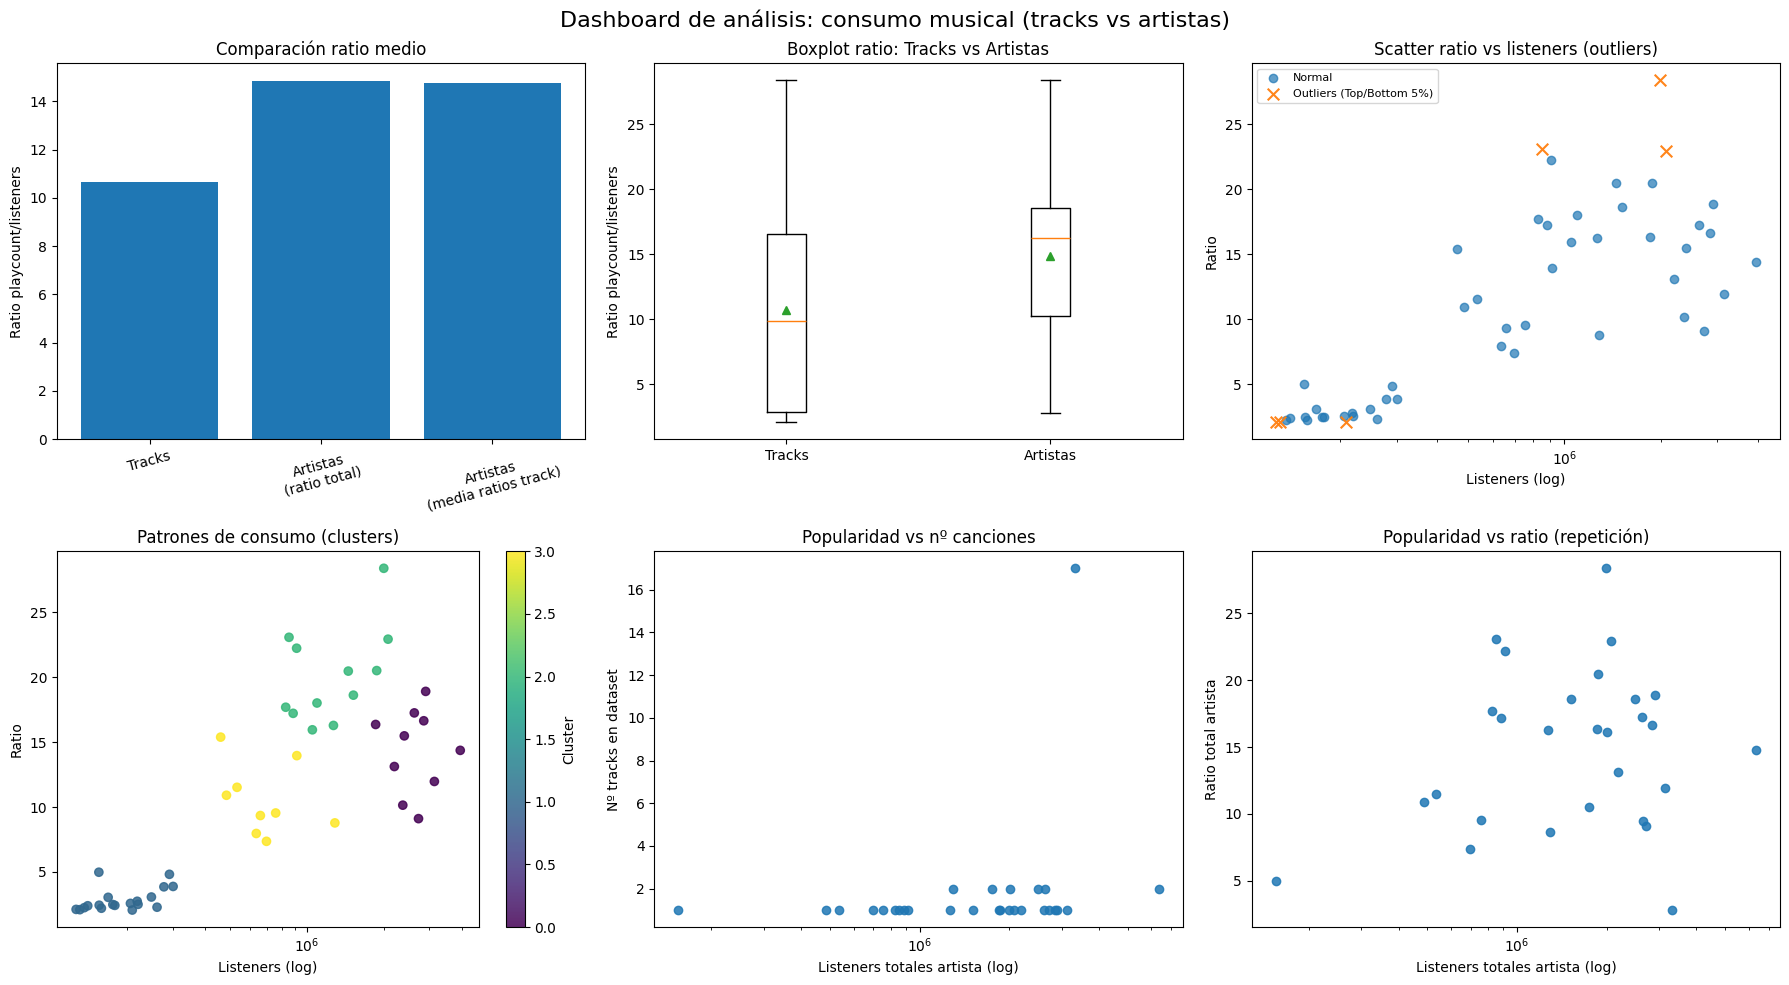

<Figure size 640x480 with 0 Axes>

In [104]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Dashboard de análisis: consumo musical (tracks vs artistas)", fontsize=16)
ax = axes[0, 0]
labels = ["Tracks", "Artistas\n(ratio total)", "Artistas\n(media ratios track)"]
values = [track_mean_ratio, artist_mean_total, artist_mean_trackmean]
ax.bar(labels, values)
ax.set_title("Comparación ratio medio")
ax.set_ylabel("Ratio playcount/listeners")
ax.tick_params(axis="x", rotation=15)
ax = axes[0, 1]
ax.boxplot(
    [df_tracks["ratio"].values, artist_agg["ratio_total"].values],
    tick_labels=["Tracks", "Artistas"],
    showmeans=True
)
ax.set_title("Boxplot ratio: Tracks vs Artistas")
ax.set_ylabel("Ratio playcount/listeners")

ax = axes[0, 2]
ax.scatter(
    df_tracks.loc[~df_tracks["is_outlier"], "listeners"],
    df_tracks.loc[~df_tracks["is_outlier"], "ratio"],
    alpha=0.7,
    label="Normal"
)

ax.scatter(
    df_tracks.loc[df_tracks["is_outlier"], "listeners"],
    df_tracks.loc[df_tracks["is_outlier"], "ratio"],
    alpha=0.95,
    marker="x",
    s=70,
    label="Outliers (Top/Bottom 5%)"
)

ax.set_xscale("log")
ax.set_title("Scatter ratio vs listeners (outliers)")
ax.set_xlabel("Listeners (log)")
ax.set_ylabel("Ratio")
ax.legend(fontsize=8)

ax = axes[1, 0]
scatter = ax.scatter(df_tracks["listeners"], df_tracks["ratio"], c=df_tracks["cluster"], alpha=0.85)
ax.set_xscale("log")
ax.set_title("Patrones de consumo (clusters)")
ax.set_xlabel("Listeners (log)")
ax.set_ylabel("Ratio")
# colorbar para clusters
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label("Cluster")

# -------------------------------------------------------
# (5) Popularidad artista vs nº canciones
# -------------------------------------------------------
ax = axes[1, 1]
ax.scatter(artist_stats["total_listeners"], artist_stats["n_tracks"], alpha=0.85)
ax.set_xscale("log")
ax.set_title("Popularidad vs nº canciones")
ax.set_xlabel("Listeners totales artista (log)")
ax.set_ylabel("Nº tracks en dataset")

# -------------------------------------------------------
# (6) Popularidad artista vs ratio
# -------------------------------------------------------
ax = axes[1, 2]
ax.scatter(artist_stats["total_listeners"], artist_agg["ratio_total"], alpha=0.85)
ax.set_xscale("log")
ax.set_title("Popularidad vs ratio (repetición)")
ax.set_xlabel("Listeners totales artista (log)")
ax.set_ylabel("Ratio total artista")

plt.tight_layout()
plt.show()

ax = axes[1, 0]
scatter = ax.scatter(df_tracks["listeners"], df_tracks["ratio"], c=df_tracks["cluster"], alpha=0.85)
ax.set_xscale("log")
ax.set_title("Patrones de consumo (clusters)")
ax.set_xlabel("Listeners (log)")
ax.set_ylabel("Ratio")
# colorbar para clusters
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label("Cluster")

ax = axes[1, 1]
ax.scatter(artist_stats["total_listeners"], artist_stats["n_tracks"], alpha=0.85)
ax.set_xscale("log")
ax.set_title("Popularidad vs nº canciones")
ax.set_xlabel("Listeners totales artista (log)")
ax.set_ylabel("Nº tracks en dataset")

ax = axes[1, 2]
ax.scatter(artist_stats["total_listeners"], artist_agg["ratio_total"], alpha=0.85)
ax.set_xscale("log")
ax.set_title("Popularidad vs ratio (repetición)")
ax.set_xlabel("Listeners totales artista (log)")
ax.set_ylabel("Ratio total artista")

plt.tight_layout()
plt.show()

In [105]:
print(artist_stats.columns)

Index(['artist', 'n_tracks', 'total_playcount', 'total_listeners',
       'ratio_total', 'ratio_mean_track'],
      dtype='object')
